# GGR274 Final Project

## LINK TO VIDEO PRESENTATION:
https://play.library.utoronto.ca/watch/86ba43a41e0ae2eafbb586163acab9e7

## Jupyter Notebook Table of Contents

1. Conference slides as presented in the video.
1. All code that sets up the visualizations used in the slideshow (hidden for readability, ok to unhide and inspect if needed).
    * Code for visualizations that are used in the slides are shown for clarity. This is to demonstrate that the visualizations in the slides are generated within the notebook, not inserted as an image disconnected from code in the notebook or hard-coded, as per the directions.

# Slides

## Mammogram Rates and Socioeconomic Landscapes: a spatial analysis of Toronto's neighbourhoods

### Name:  

### Tutorial: TUT0601

### Introduction
* Mammograms are critical to detecting and treating early signs of breast cancer. However, mammogram rates across the City of Toronto are varied and disparate.

* What is the relationship between mammogram rates, health infrastructure, and socioeconomic conditions in Toronto's neighbourhoods?

* Employed spatial analysis and regression to explore and visualize these relationships.

* MBM = Statistics Canada's official measure of poverty using cost of neccessities and services relative to regions across Canada.

### Data
What data was used to examine this relationship?
1. Income data and the `geoJSON` of Toronto's neighbourhoods was provided by **Toronto's Open Data Portal**.
2. Mammogram participation data provided by **Ontario Community Health**.
3. Clinic locations were web-scraped from [Cancer Care Ontario](https://www.cancercareontario.ca/en/find-cancer-services/breast-screening-locations/locations-list) and coordinates were obtained via Google Maps. This data was put into another `geoJSON`.

###  Methods

How was the data provided by **Toronto's Open Data Portal** and **Ontario Community Health** analyzed?

1. The aforementioned data sets were wrangled using functions such as the **`rename`**, **`read_excel`**, **`merge`** and **`drop`** functions.
2. `geoJSON` files for Toronto's neighbourhoods and mammogram clinic locations were imported into the Notebook, merged into the main dataframe, and plotted in relation to each other on **boxplots** and **maps** (Figs. 1 and 2) to investigate the distribution of clinics in relation to health and economic factors.
3. A scatter plot with a regression line was generated using **`regplot`** to investigate a direct relationship between health outcomes and economic conditions.

<div style="display:flex;flex-direction:row;">
  <div style="flex:1;margin-right:20px;">
    <img src="boxplot_mammogram.png" alt="mammogram map/boxplot" style="max-width:100%;width:100%;height:auto;max-height:375px;">
  </div>
  <div style="flex:1;">
    <img src="boxplot_MBM.png" alt="MBM map/boxplot" style="max-width:100%;width:100%;height:auto;max-height:375px;">
  </div>
</div>
<div style="display:flex;justify-content:center;">
  <div style="position:relative;max-width:50%;display:flex;">
    <div style="position:absolute;left:100%;margin-left:20px;top:20px; width: 400px;">
      <div style="font-size: 14px;padding: 10px;background-color: #F8F8F8;border: 1px solid #D8D8D8;border-radius: 5px;">
        <h3 id="results" style="margin-top:0;">Results</h3>
        <ul style="margin-bottom:0;">
          <li>These visualizations pull from the wrangled data frames to explore the relationship between:
            <ol>
              <li>Clinic locations and income landscape</li>
              <li>Clinic locations and mammogram participation</li>
              <li>Income landscape and mammogram participation.</li>
            </ol>
          </li>
        </ul>
      </div>
    </div>
    <img src="mammogram_MBM_regplot.png" alt="mammogram MBM regplot" style="max-width:100%;width:80%;height:auto;max-height:600px;">
  </div>
</div>


## Conclusion

* No dominant correlation between socioeconomic status and clinic presence, nor mammogram rates and clinic presence.
* Relationship between mammogram rate and socioeconomic conditions: higher rates are associated with neighbourhoods with fewer individuals in poverty. There are likely other infrastructural issues that prevent individuals from getting life-saving healthcare.
* The clinic dataset is limited to locations within the City of Toronto. Future analysis could include clinic locations in the GTA. Future analsyis could also examine other factors such as access to public transit or vehicles, or childcare needs.


## Data Wrangling and Visualization Code

In [1]:
#import required modules
%pip install openpyxl
%pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import geopandas as gpd 
import mapclassify
import xlrd
import esda
import splot
import libpysal as lps
import contextily as cx



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# read economic data into the notebook
economy_df = pd.read_excel('census_2016_Income_neighb_LHIN.xlsx', sheet_name='IncomePersons_MBM_neighb_TOR',header=12)

#trim the dataset
economy_trim_df = economy_df[economy_df.columns[[0,1,4]]]
income_df = economy_trim_df.drop([0,1])

#rename columns
column_names = {'NEIGHBOURHOOD ID': 'neighbourhood_id',
               'NEIGHBOURHOOD NAME': 'neighbourhood_name',
               'Unnamed: 4': 'percent_MBM'}
income_df = income_df.rename(columns=column_names)


In [3]:
# this process is repeated with the mammograms dataset. 
# read the mammograms spreadsheet into the notebook.
health_df = pd.read_excel('Prevention_neighb_2016-2018_LHIN.xlsx', sheet_name='pr_Mammograms',header=11)

#trim the dataset
health_trim_df = health_df[health_df.columns[[0,1,4]]]
mammograms_df = health_trim_df.drop([0,141,142])

#rename columns
newnames = {'Neighb ID': 'neighbourhood_id',
           'Neighbourhood Name': 'neighbourhood_name',
           'Unnamed: 4': 'mammogram_percentage'}
mammogram_rates = mammograms_df.rename(columns=newnames)


In [4]:
#merge the dataframes on neighbourhood_id and neighbourhood_name

mammograms_income_df = pd.merge(mammogram_rates, income_df,  how='left', left_on=['neighbourhood_id','neighbourhood_name'], right_on = ['neighbourhood_id','neighbourhood_name'])
mammograms_income_df.head()

,neighbourhood_id,neighbourhood_name,mammogram_percentage,percent_MBM
0,1.0,West Humber-Clairville,57.6,17.905507
1,2.0,Mount Olive-Silverstone-Jamestown,50.9,29.417122
2,3.0,Thistletown-Beaumond Heights,54.1,19.343946
3,4.0,Rexdale-Kipling,53.7,20.303605
4,5.0,Elms-Old Rexdale,52.3,24.471459


In [5]:
# change data type so the values can be plotted.
mammograms_income_df['percent_MBM'] = mammograms_income_df['percent_MBM'].astype(float)
mammograms_income_df['mammogram_percentage'] = mammograms_income_df['mammogram_percentage'].astype(float)


In [6]:
# importing map data
neighbourhood_map = gpd.GeoDataFrame.from_file("Toronto_Neighbourhoods.geojson")

# wrangling
important_spat_cols = neighbourhood_map.columns[[4, 5, 17]]
colnames_spat = {important_spat_cols[0]: 'name',
           important_spat_cols[1] : 'nbrhd_spat_id',
           important_spat_cols[2] : 'geometry'}

neighbourhood_mapped = neighbourhood_map.copy()

neighbourhood_mapped = neighbourhood_mapped[important_spat_cols]

neighbourhood_mapped.rename(columns = colnames_spat, inplace=True)
neighbourhood_mapped["neighbourhood_id"] = neighbourhood_mapped["nbrhd_spat_id"].astype(int)
neighbourhood_mapped.head()



ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,name,nbrhd_spat_id,geometry,neighbourhood_id
0,Casa Loma (96),096,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",96
1,Annex (95),095,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",95
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",109
3,Woodbine Corridor (64),064,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",64
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",103


In [7]:
clinic_map = gpd.GeoDataFrame.from_file("clinic_locations_toronto.geojson")
clinic_map = clinic_map.rename(columns={'Neighbourhood Name': 'neighbourhood_name'})

clinic_map.head()

,Clinic Name,neighbourhood_name,geometry
0,PDS Diagnostic Imaging,York Univeristy Heights,POINT (-79.47234 43.76659)
1,North York General Hospital - General Site,Henry Farm,POINT (-79.36276 43.76902)
2,St. Joseph's Health Centre,South Parkdale,POINT (-79.45009 43.64027)
3,Roncesvalles X-Ray & US,Roncesvalles,POINT (-79.44611 43.64007)
4,Michael Garron Hospital,Danforth East York,POINT (-79.32431 43.69005)


In [8]:
full_spatial_data = neighbourhood_mapped.merge(mammograms_income_df, on="neighbourhood_id")

full_spatial_data.head()


,name,nbrhd_spat_id,geometry,neighbourhood_id,neighbourhood_name,mammogram_percentage,percent_MBM
0,Casa Loma (96),096,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",96,Casa Loma,59.8,14.565316
1,Annex (95),095,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",95,Annex,55.1,20.569931
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",109,Caledonia-Fairbank,65.0,15.527638
3,Woodbine Corridor (64),064,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",64,Woodbine Corridor,59.3,17.398244
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",103,Lawrence Park South,65.1,8.204283


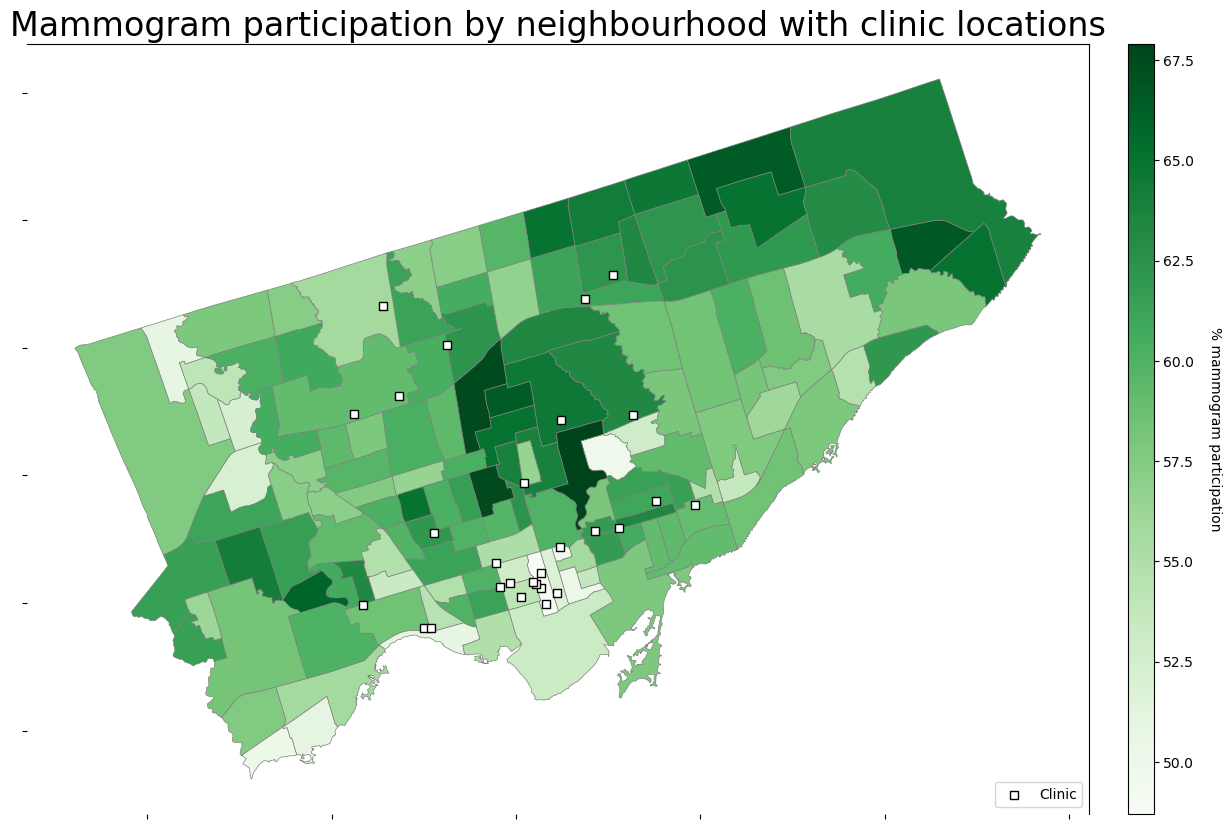

In [10]:
import matplotlib.colors as colors

fig, axes = plt.subplots(1,1, figsize = (25,10))

# Create a ScalarMappable object using the colormap
cmap = 'Greens'
norm = colors.Normalize(vmin=full_spatial_data['mammogram_percentage'].min(), vmax=full_spatial_data['mammogram_percentage'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create the plot and set the colorbar size using the pad and aspect parameters
full_spatial_data.plot(column = 'mammogram_percentage',
                         legend=False,ax=axes,
                         cmap=cmap, norm=norm,
                         edgecolor='grey', linewidth=0.5)

cbar = plt.colorbar(sm, ax=axes, pad=0.02, aspect=30)
cbar.set_label('% mammogram participation', rotation=270, labelpad=20)

# Remove the tick labels and spines from the axes
axes.tick_params(labelbottom=False, labelleft=False)
axes.spines['bottom'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.set_title("Mammogram participation by neighbourhood with clinic locations",fontsize=24)

# Add a legend for the clinic markers in the bottom right corner
clinic_map.plot(ax=axes, color="white", edgecolor = "black", marker=",", markersize=27, label="Clinic")
axes.legend(loc='lower right')

plt.show()


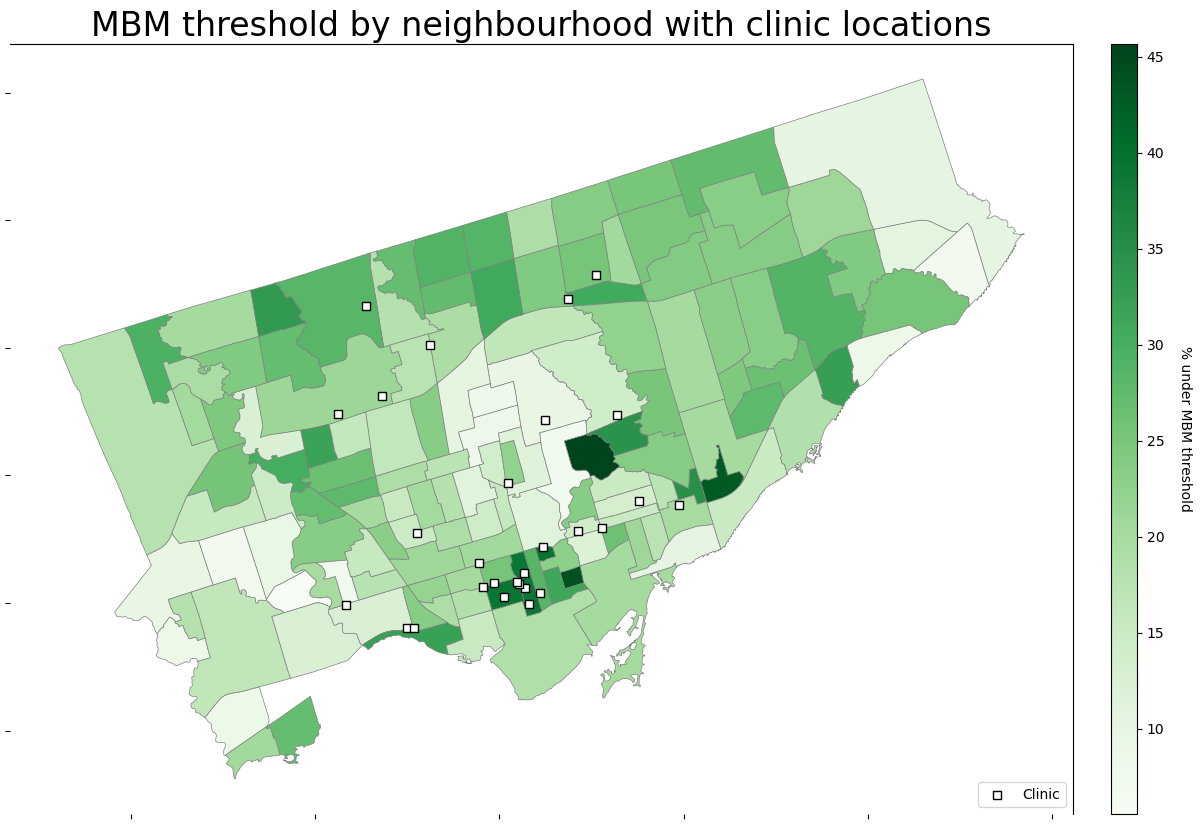

In [11]:
import matplotlib.colors as colors

fig, axes = plt.subplots(1,1, figsize = (25,10))

# Create a ScalarMappable object using the colormap
cmap = 'Greens'
norm = colors.Normalize(vmin=full_spatial_data['percent_MBM'].min(), vmax=full_spatial_data['percent_MBM'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create the plot and set the colorbar size using the pad and aspect parameters
full_spatial_data.plot(column = 'percent_MBM',
                         legend=False,ax=axes,
                         cmap=cmap, norm=norm,
                         edgecolor='grey', linewidth=0.5,legend_kwds={'label': '% under MBM threshold'})

cbar = plt.colorbar(sm, ax=axes, pad=0.02, aspect=30)
cbar.set_label('% under MBM threshold', rotation=270, labelpad=20)

# Remove the tick labels and spines from the axes
axes.tick_params(labelbottom=False, labelleft=False)
axes.spines['bottom'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.set_title("MBM threshold by neighbourhood with clinic locations",fontsize=24)

# Add a legend for the clinic markers in the bottom right corner
clinic_map.plot(ax=axes, color="white", edgecolor = "black", marker=",", markersize=27, label="Clinic")
axes.legend(loc='lower right')

plt.show()

In [12]:
join_left_df = full_spatial_data.sjoin(clinic_map, how="left", predicate = "intersects")
join_left_df.head()

,name,nbrhd_spat_id,geometry,neighbourhood_id,neighbourhood_name_left,mammogram_percentage,percent_MBM,index_right,Clinic Name,neighbourhood_name_right
0,Casa Loma (96),096,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",96,Casa Loma,59.8,14.565316,NaN,NaN,NaN
1,Annex (95),095,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",95,Annex,55.1,20.569931,5.0,Annex Medical Imaging,Annex
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",109,Caledonia-Fairbank,65.0,15.527638,NaN,NaN,NaN
3,Woodbine Corridor (64),064,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",64,Woodbine Corridor,59.3,17.398244,NaN,NaN,NaN
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",103,Lawrence Park South,65.1,8.204283,NaN,NaN,NaN


In [13]:
no_duplicates_gdf = join_left_df.copy()
no_duplicates_gdf = no_duplicates_gdf.drop_duplicates('neighbourhood_name_left')

no_duplicates_gdf.head()

,name,nbrhd_spat_id,geometry,neighbourhood_id,neighbourhood_name_left,mammogram_percentage,percent_MBM,index_right,Clinic Name,neighbourhood_name_right
0,Casa Loma (96),096,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",96,Casa Loma,59.8,14.565316,NaN,NaN,NaN
1,Annex (95),095,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",95,Annex,55.1,20.569931,5.0,Annex Medical Imaging,Annex
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",109,Caledonia-Fairbank,65.0,15.527638,NaN,NaN,NaN
3,Woodbine Corridor (64),064,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",64,Woodbine Corridor,59.3,17.398244,NaN,NaN,NaN
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",103,Lawrence Park South,65.1,8.204283,NaN,NaN,NaN


<AxesSubplot: >

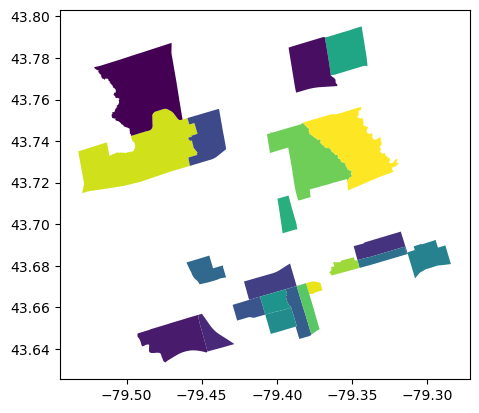

In [14]:
no_duplicates_gdf.plot(column = "index_right")

In [15]:
clinic_present = no_duplicates_gdf["index_right"] >= 0
clinic_not_present = no_duplicates_gdf["index_right"].isnull()
print(clinic_present.value_counts())
print(clinic_not_present.value_counts())

False    118
True      22
Name: index_right, dtype: int64
True     118
False     22
Name: index_right, dtype: int64


In [16]:

final_clinic_analysis = no_duplicates_gdf.copy()
final_clinic_analysis.loc[clinic_present, 'clinic_present'] = True
final_clinic_analysis.loc[clinic_not_present, 'clinic_present'] = False
final_clinic_analysis.head()

,name,nbrhd_spat_id,geometry,neighbourhood_id,neighbourhood_name_left,mammogram_percentage,percent_MBM,index_right,Clinic Name,neighbourhood_name_right,clinic_present
0,Casa Loma (96),096,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",96,Casa Loma,59.8,14.565316,NaN,NaN,NaN,False
1,Annex (95),095,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",95,Annex,55.1,20.569931,5.0,Annex Medical Imaging,Annex,True
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",109,Caledonia-Fairbank,65.0,15.527638,NaN,NaN,NaN,False
3,Woodbine Corridor (64),064,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",64,Woodbine Corridor,59.3,17.398244,NaN,NaN,NaN,False
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",103,Lawrence Park South,65.1,8.204283,NaN,NaN,NaN,False


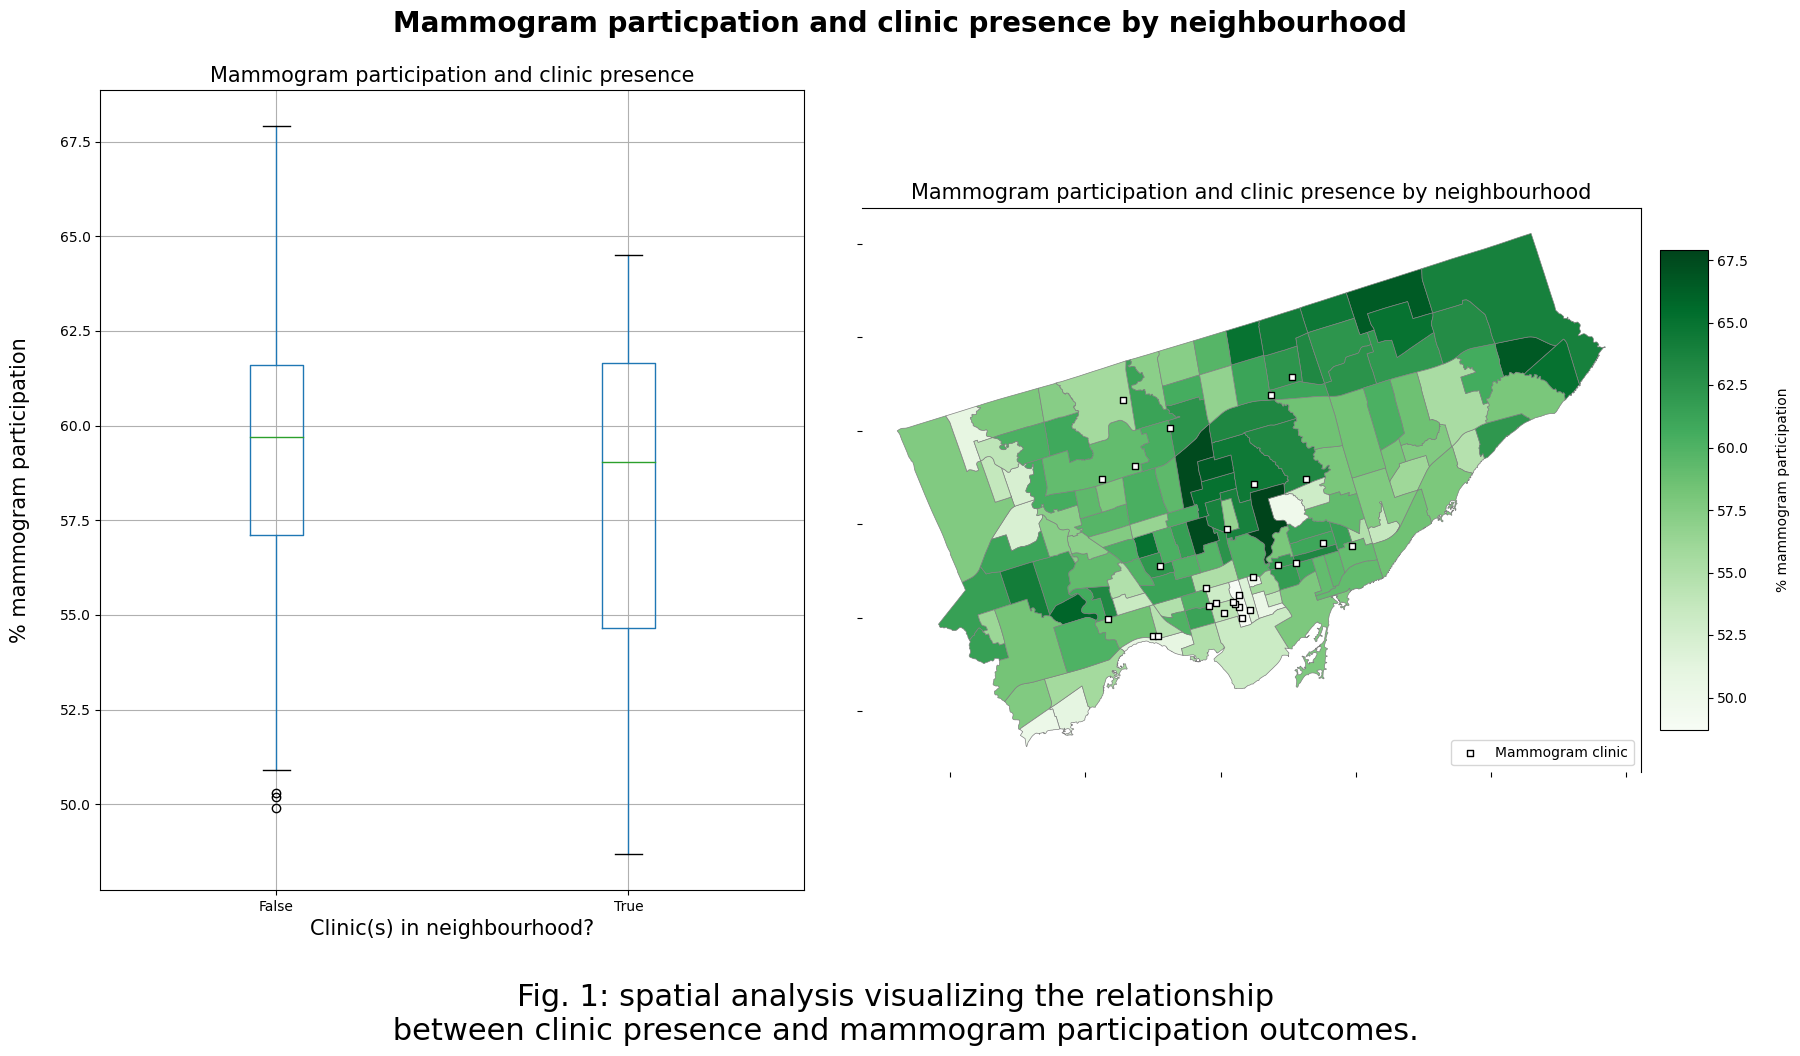

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [3, 4]})

# Plot the first plot on the first subplot
final_clinic_analysis.boxplot(column="mammogram_percentage", 
                               by="clinic_present", 
                               ax=axes[0], 
                               meanline=True, 
                               meanprops={"linewidth": 2, "color": "red"})
axes[0].set_title("")
axes[0].set_ylabel("% mammogram participation", fontsize=15)
axes[0].set_xlabel("Clinic(s) in neighbourhood?", fontsize=15)
axes[0].set_title("Mammogram participation and clinic presence", fontsize=15)
axes[0].yaxis.set_label_coords(-0.1, 0.5)

# Plot the second plot on the second subplot
cmap = 'Greens'
norm = colors.Normalize(vmin=full_spatial_data['mammogram_percentage'].min(), vmax=full_spatial_data['mammogram_percentage'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

full_spatial_data.plot(column = 'mammogram_percentage',
                       legend=False,ax=axes[1],
                       cmap=cmap, norm=norm,
                       edgecolor='grey', linewidth=0.5)

cbar = plt.colorbar(sm, ax=axes[1], pad=0.02, aspect=10, shrink=0.6)
cbar.set_label('% mammogram participation', rotation=90, labelpad=20)

axes[1].tick_params(labelbottom=False, labelleft=False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].set_title("Mammogram participation and clinic presence by neighbourhood",fontsize=15)

clinic_map.plot(ax=axes[1], color="white", edgecolor = "black", marker=",", markersize=15, label="Mammogram clinic")
axes[1].legend(loc='lower right')

fig.suptitle("Mammogram particpation and clinic presence by neighbourhood", fontsize=20, fontweight="bold")
# Adjust the spacing
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.9, wspace=0.07, hspace=0.25)

# Add a caption
fig.text(0.5, -0.05, "Fig. 1: spatial analysis visualizing the relationship \n between clinic presence and mammogram participation outcomes.", ha='center', fontsize=22)
plt.show()


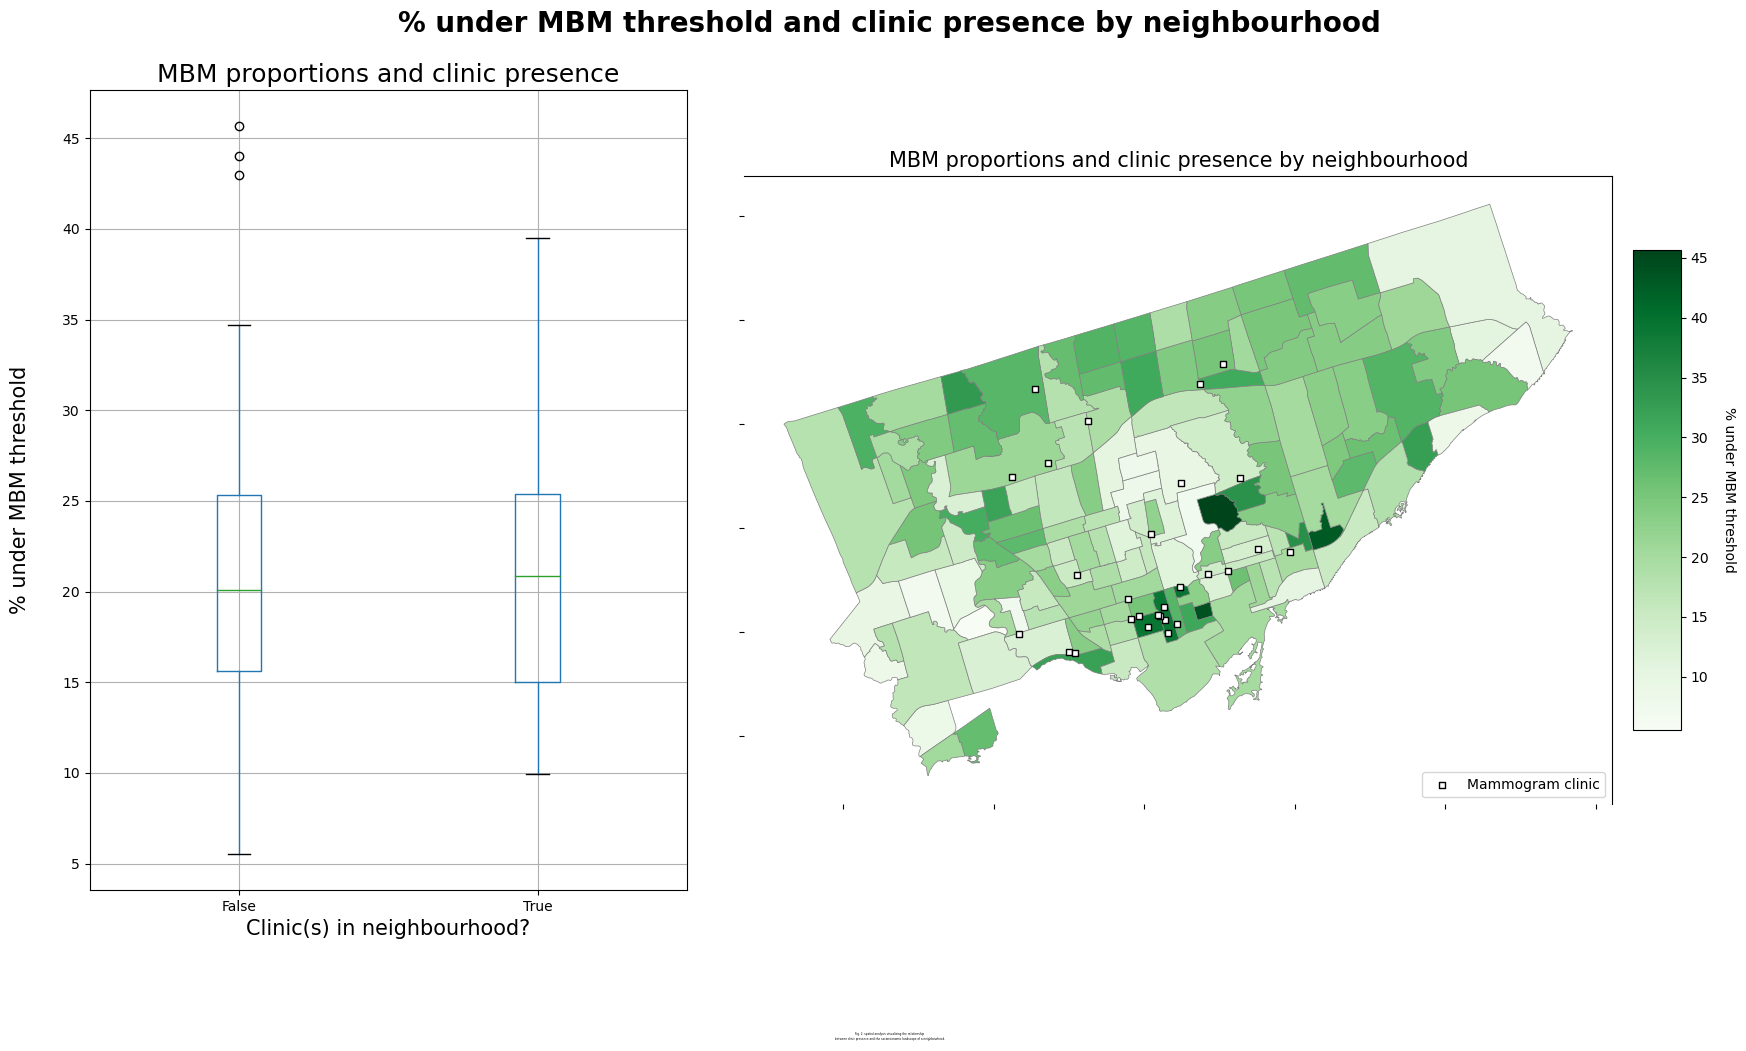

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [4, 7]})

# boxplot
final_clinic_analysis.boxplot(column="percent_MBM", 
                               by = "clinic_present", 
                               ax = axes[0])

axes[0].set_title("MBM proportions and clinic presence",fontsize=18)
axes[0].set_ylabel("% under MBM threshold", fontsize = 15)
axes[0].set_xlabel("Clinic(s) in neighbourhood?", fontsize = 15)
axes[0].yaxis.set_label_coords(-0.1, 0.5)


# cmap
# Create a ScalarMappable object using the colormap
cmap = 'Greens'
norm = colors.Normalize(vmin=full_spatial_data['percent_MBM'].min(), vmax=full_spatial_data['percent_MBM'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# sizing
full_spatial_data.plot(column = 'percent_MBM',
                         legend=False,ax=axes[1],
                         cmap=cmap, norm=norm,
                         edgecolor='grey', linewidth=0.5,legend_kwds={'label': '% under MBM threshold in neighbourhood'})

cbar = plt.colorbar(sm, ax=axes[1], pad=0.02, aspect=10, shrink=0.6)
cbar.set_label('% under MBM threshold', rotation=270, labelpad=20)

# Remove the tick labels and spines from the axes
axes[1].tick_params(labelbottom=False, labelleft=False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].set_title("MBM proportions and clinic presence by neighbourhood", fontsize=15)
#  legend
clinic_map.plot(ax=axes[1], color="white", edgecolor = "black", marker=",", markersize=15, label="Mammogram clinic")
axes[1].legend(loc='lower right')

# title
fig.suptitle("% under MBM threshold and clinic presence by neighbourhood", fontsize=20, fontweight="bold")

# spacing
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.9, wspace=0.07, hspace=0.25)
# caption
fig.text(0.5, -0.05, "Fig. 2: spatial analysis visualizing the relationship \n between clinic presence and the socioeconomic landscape of a neighbourhood.", ha='center', fontsize=2)
plt.show()


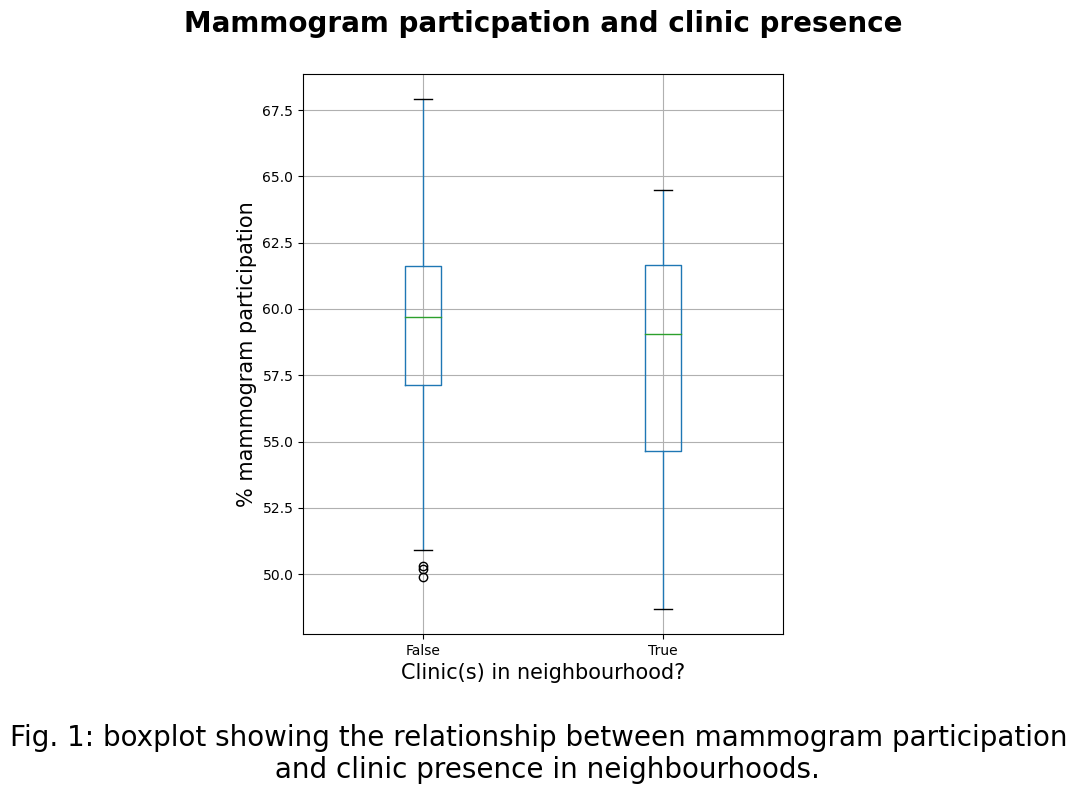

In [19]:
# create a boxplot comparing infrastructre and mammogram outcomes
fig, ax = plt.subplots(figsize=(6, 8))
final_clinic_analysis.boxplot(column="mammogram_percentage", 
                               by="clinic_present", 
                               ax=ax, 
                               meanline=True, 
                               meanprops={"linewidth": 2, "color": "red"})

# set the axis labels and title
ax.set_xlabel("Clinic(s) in neighbourhood?", fontsize=15)
ax.set_ylabel("% mammogram participation", fontsize=15)
ax.set_title("", fontsize=15)
fig.suptitle("Mammogram particpation and clinic presence", fontsize=20, fontweight="bold")

# adjust the spacing
plt.subplots_adjust(bottom=0.2)

# add a caption
fig.text(0.5, 0.02, "Fig. 1: boxplot showing the relationship between mammogram participation \n and clinic presence in neighbourhoods.", ha='center', fontsize=20)

plt.show()

Text(0.5, -0.05, 'Fig. 2: boxplot visualizing the relationship between clinic presence \n and the socioeconomic landscape of a neighbourhood.')

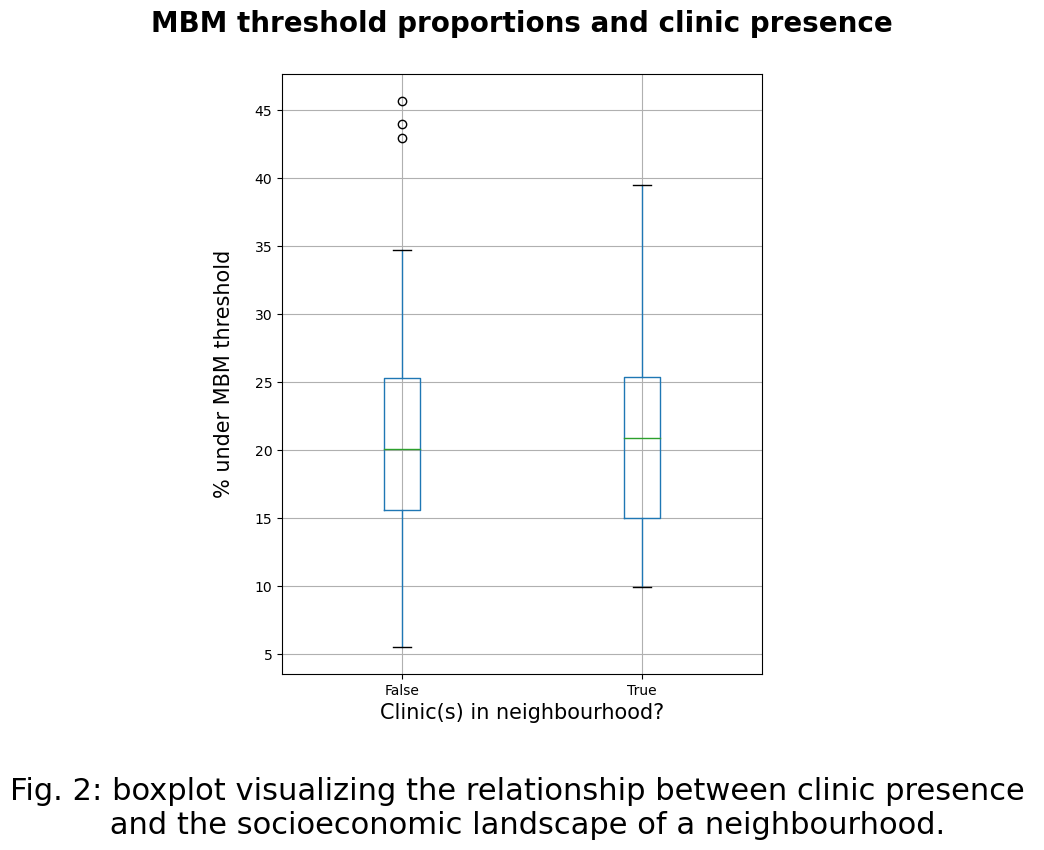

In [20]:
# create a boxplot that compares MBM status to clinic distribution
fig, ax = plt.subplots(figsize=(6, 8))
final_clinic_analysis.boxplot(column="percent_MBM", by="clinic_present", ax=ax)


ax.set_title("", fontsize=18)

ax.set_ylabel("% under MBM threshold", fontsize=15)
ax.set_xlabel("Clinic(s) in neighbourhood?", fontsize=15)
ax.yaxis.set_label_coords(-0.1, 0.5)
fig.suptitle("MBM threshold proportions and clinic presence", fontsize=20, fontweight="bold")

fig.text(0.5, -0.05, "Fig. 2: boxplot visualizing the relationship between clinic presence \n and the socioeconomic landscape of a neighbourhood.", ha='center', fontsize=22)

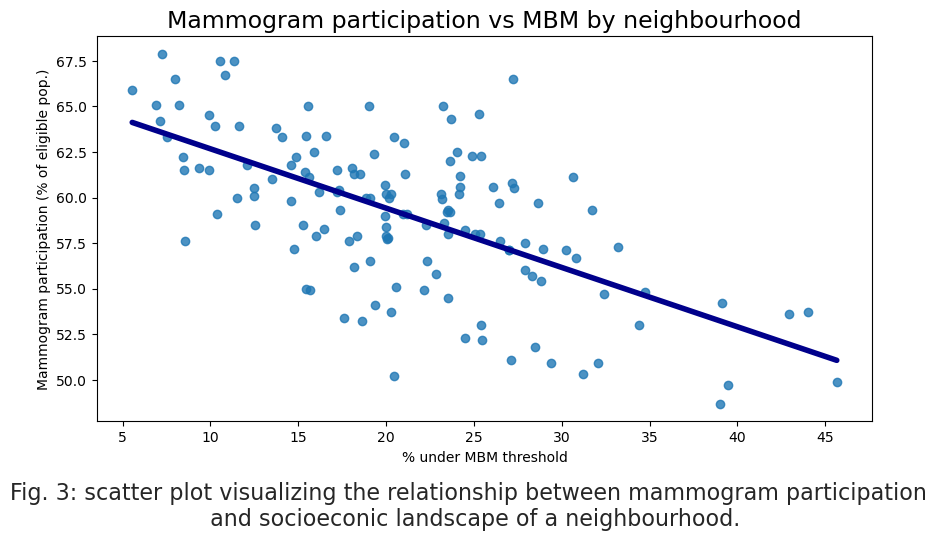

In [21]:
# generate non-spatial regplot comparing mammograms and MBM
# TO BE USED IN SLIDES.
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5))
sns.set(style="darkgrid")
sns.regplot(x="percent_MBM", y="mammogram_percentage", data=mammograms_income_df, ci=None, line_kws={'color': 'darkblue','lw':4})
plt.title('Mammogram participation vs MBM by neighbourhood', fontsize=17)
plt.xlabel('% under MBM threshold',fontsize=10)
plt.ylabel('Mammogram participation (% of eligible pop.)',fontsize=10)
#caption
fig.text(0.5, -0.1, "Fig. 3: scatter plot visualizing the relationship between mammogram participation \n and socioeconic landscape of a neighbourhood.", ha='center', fontsize=16)
# Show the plot
plt.show()
